## Focus in comparison distribution of distances and utilisation

After EDA Berlin, we decided to focus in this two graphs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.options.display.max_columns = None
pd.options.display.max_rows = 100

%matplotlib inline

Already done in previous notebook

#### Import and preparating data

In [2]:
path = '../data/'

In [3]:
distance = pd.read_csv(path + "flight_data_de_with_distances_v2.csv")
routes = pd.read_csv(path + "flight_data_de.csv")

In [4]:
# drop uncomfortable column
distance = distance.drop(columns=["Unnamed: 0"])

In [5]:
# missing info in distances for Berlin routes
missing_routes=[{"DE_EDDB_NO_ENOS":875.286425,
                 "DE_EDDB_CH_LSZM":684.067803, 
                 "DE_EDDT_CH_LSZM":689.0904, 
                 "DE_EDDT_ES_LECP":1656.439537,
                 "DE_EDDB_ES_LECP":1648.743229}]

In [6]:
# create dataframe
missing_distances = (pd.DataFrame(missing_routes)
                     .transpose()
                     .reset_index()
                     .rename(columns={"index":"flight", 0:"distance"}))

In [7]:
# add those routes to the distance file
distance = distance.append(missing_distances, ignore_index = True)

In [8]:
# subset routes from Berlin (TXL and SXF)
routes_b = routes.loc[(routes["fr_airport"] == "EDDB")|(routes["fr_airport"] == "EDDT")]

In [9]:
# merge routes_b with distance to add the information
routes_b = routes_b.merge(distance, left_on="route", right_on="flight", how="left")

In [10]:
# drop repeated column "flight" column
routes_b = routes_b.drop(columns=["flight"])

In [11]:
# subset routes from Berlin in 2018
routes_b_2018 = routes_b[(routes_b["month"] > "2017-12-01") & (routes_b["month"] < "2019-01-01")]
routes_b_2018

,route,fr_country,fr_airport,to_country,to_airport,month,flight_d,seat_d,passenger_d,distance
1088,DE_EDDB_AT_LOWW,DE,EDDB,AT,LOWW,2018-12-01,33.0,4512.0,2904.0,522.191804
1089,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2018-12-01,39.0,7371.0,6790.0,646.455762
1090,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2018-12-01,34.0,6060.0,5701.0,1306.358290
1091,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2018-12-01,62.0,9557.0,7980.0,869.238264
1092,DE_EDDB_CH_LSZH,DE,EDDB,CH,LSZH,2018-12-01,5.0,54.0,14.0,652.679807
...,...,...,...,...,...,...,...,...,...,...
2239,DE_EDDT_UA_UKBB,DE,EDDT,UA,UKBB,2018-01-01,32.0,5874.0,2565.0,1245.145555
2240,DE_EDDT_UK_EGLC,DE,EDDT,UK,EGLC,2018-01-01,64.0,5942.0,4128.0,914.343880
2241,DE_EDDT_UK_EGLL,DE,EDDT,UK,EGLL,2018-01-01,274.0,42576.0,27121.0,950.244024
2242,DE_EDDT_US_KEWR,DE,EDDT,US,KEWR,2018-01-01,18.0,3821.0,2810.0,6404.820906


## TXL vs SXF : distribution of the distance

In [12]:
# TXL
routes_b_2018.loc[routes_b_2018["fr_airport"] == "EDDT"].describe()

,flight_d,seat_d,passenger_d,distance
count,576.000000,576.000000,576.000000,576.000000
mean,138.178819,22876.015625,17116.232639,1684.857129
std,171.066153,28910.906407,21190.016007,1567.519847
min,1.000000,8.000000,1.000000,342.894486
25%,31.000000,5586.000000,4341.500000,654.052562
50%,64.000000,9405.500000,7377.500000,1121.329637
75%,142.000000,26176.250000,20282.500000,1914.292295
max,824.000000,148625.000000,113748.000000,7376.329350


In [13]:
# SXF
routes_b_2018.loc[routes_b_2018["fr_airport"] == "EDDB"].describe()

,flight_d,seat_d,passenger_d,distance
count,580.000000,580.000000,580.000000,580.000000
mean,58.396552,10020.772414,8626.641379,1293.535896
std,32.531658,5588.466127,4739.594432,714.972264
min,4.000000,28.000000,7.000000,364.838246
25%,32.000000,5837.000000,5036.250000,828.065624
50%,50.000000,8340.500000,7525.500000,1076.858393
75%,70.250000,12015.000000,10664.750000,1601.643402
max,160.000000,29471.000000,25291.000000,3672.588688


##### In regards of the distance, median has similar values, 1121 vs 1076, however, the std of TXL more than doubled SXF (1567 vs 714)

#### Goals:
- plot both in the same table with different colour
- define same size of bins
- use seaborn for visualisation

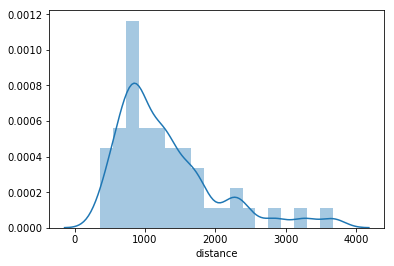

In [14]:
sns.distplot(routes_b_2018.loc[routes_b_2018["fr_airport"] == "EDDB"]["distance"]);

In [15]:
sxf = routes_b_2018.loc[routes_b_2018["fr_airport"] == "EDDB"]["distance"]

In [16]:
txl = routes_b_2018.loc[routes_b_2018["fr_airport"] == "EDDT"]["distance"]

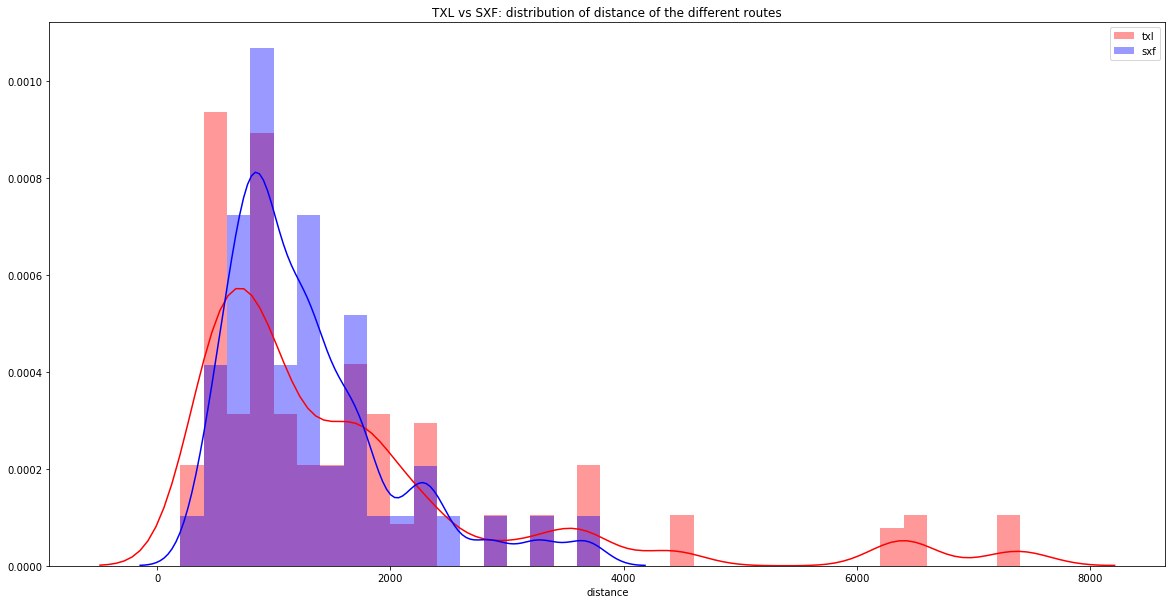

In [17]:
fig, ax = plt.subplots(figsize=(20,10));
sns.distplot(txl, bins = range(0,8200,200), color="r");
sns.distplot(sxf, bins = range(0,8200,200), color="b");
ax.legend(("txl","sxf"));
ax.set_title("TXL vs SXF: distribution of distance of the different routes");

## TXL vs SXF : distribution of the utilisation

In [18]:
# add utilisation = passengers / seats per route

routes_b_2018 = (routes_b_2018
                 .assign(utilisation = (routes_b_2018['passenger_d'] / routes_b_2018['seat_d'])*100))

In [19]:
sxf = routes_b_2018.loc[routes_b_2018["fr_airport"] == "EDDB"]["utilisation"]
txl = routes_b_2018.loc[routes_b_2018["fr_airport"] == "EDDT"]["utilisation"]

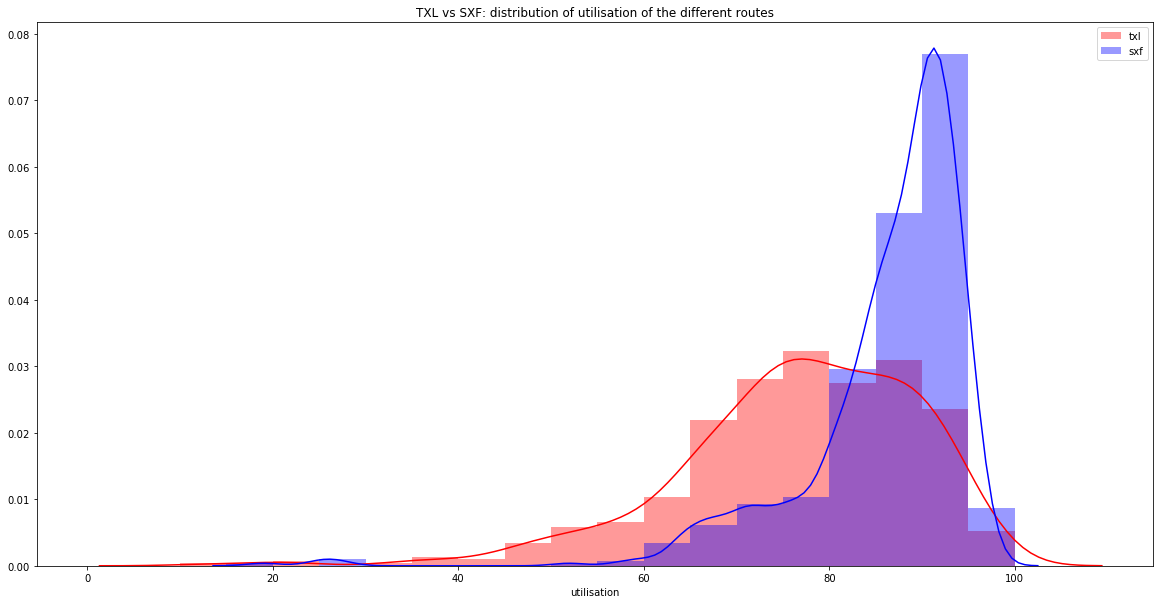

In [20]:
fig, ax = plt.subplots(figsize=(20,10));
sns.distplot(txl, bins = range(0,101,5), color="r");
sns.distplot(sxf, bins = range(0,101,5), color="b");
ax.legend(("txl","sxf"));
ax.set_title("TXL vs SXF: distribution of utilisation of the different routes");

## Generalisation:

### - SXF crowded planes (always the same size) to somewhere in Europe, very likely sunnier than Berlin
### - TXL 1/4 free seats planes heading somewhere far far away or very close (speculative to jump far far away)